# Image Classification with oxflower17 Dataset



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import os
import tflearn.datasets.oxflower17 as oxflower17
np.random.seed(1000)

Using TensorFlow backend.


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


# Load Data

[View Dataset details](http://www.robots.ox.ac.uk/~vgg/data/flowers/17/)


This is 17 category flower dataset with 80 images for each class. The flowers chosen are some common flowers in the UK. The images have large scale, pose and light variations and there are also classes with large varations of images within the class and close similarity to other classes. The categories can be seen in the figure below. We randomly split the dataset into 3 different training, validation and test sets. A subset of the images have been groundtruth labelled for segmentation.

In [2]:
x_train, y_train = oxflower17.load_data(one_hot=True)

In [3]:
imgListNames=['Daffodil','Snowdrop','Daisy','Dandelion','Coltsfoot','Cowslip',
              'Buttercup','Windflower','Pansy','LillyVally','Bluebell','Crocus',
              'Iris','Tigerlilly','Tulip','Fritillary','Sunflower']

# Preview Sample

Iris


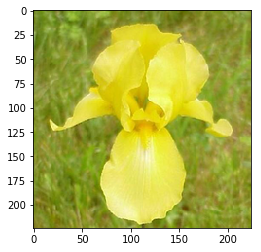

In [5]:
image_index =29
print(imgListNames[y_train[image_index].argmax()])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()



# Model

In [6]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))




model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Train

In [22]:
model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/20
1088/1088 [==============================] - 178s 164ms/step - loss: 0.6849 - acc: 0.7730 - val_loss: 2.2083 - val_acc: 0.4375
Epoch 2/20
1088/1088 [==============================] - 186s 171ms/step - loss: 0.7364 - acc: 0.7491 - val_loss: 2.4368 - val_acc: 0.4632
Epoch 3/20
1088/1088 [==============================] - 185s 170ms/step - loss: 0.5896 - acc: 0.8042 - val_loss: 2.7527 - val_acc: 0.4779
Epoch 4/20
1088/1088 [==============================] - 185s 170ms/step - loss: 0.5082 - acc: 0.8235 - val_loss: 2.5985 - val_acc: 0.4706
Epoch 5/20
1088/1088 [==============================] - 185s 170ms/step - loss: 0.4957 - acc: 0.8419 - val_loss: 2.4775 - val_acc: 0.4779
Epoch 6/20
1088/1088 [==============================] - 184s 169ms/step - loss: 0.3891 - acc: 0.8631 - val_loss: 2.5178 - val_acc: 0.5257
Epoch 7/20
1088/1088 [==============================] - 195s 179ms/step - loss: 0.5299 - acc: 0.8373 - val_loss: 4.2114 - val

# Save

In [23]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'oxflower17.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at E:\LEARNING\IPY\05 Misc\saved_models\oxflower17.h5 


# Load

In [7]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'oxflower17.h5'
model_path = os.path.join(save_dir, model_name)
model=load_model(model_path)

Instructions for updating:
Use tf.cast instead.


# Evaluate

In [8]:
# Score trained model.
scores = model.evaluate(x_train, y_train, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

 736/1360 [===============>..............] - ETA: 32s

KeyboardInterrupt: 

# Predict

Actual= Snowdrop 
Predicted= Iris


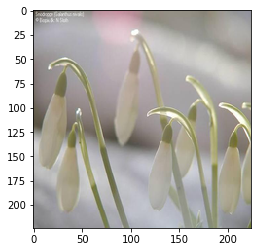

In [10]:
image_index = image_index+1
if(image_index>1000):
    image_index=0
plt.imshow(x_train[image_index],cmap='Greys')
pred = model.predict(x_train[image_index:image_index+1,:,:])
print("Actual=",imgListNames[y_train[image_index].argmax()],"\nPredicted=",imgListNames[pred.argmax()])

# Create Confusion Matrix

In [11]:
def getConfusionMatrix(Y_True,Y_Pred):
    classCount=Y_True.shape[1]
    #in case Y is in term of probablities
    Y_Pred=keras.utils.to_categorical(Y_Pred.argmax(axis = 1), classCount) 
    cnfMtrx=np.zeros((classCount,classCount))
    for i in range(classCount):
        cnfMtrx[i,:]=Y_Pred[np.where(Y_True[:,i]==1)].sum(axis=0)
    return cnfMtrx

In [12]:
Y_pred = model.predict(x_train)
Y_true = y_train
confusion_mtx = getConfusionMatrix(Y_true, Y_pred)

# Plot Confusion Matrix

In [30]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,rotation=90)
    plt.yticks(tick_marks, classes)

    for i in range(cm.shape[0]):
        for j in (range(cm.shape[1])):
            if cm[i, j] > cm.max() / 2:
                txtclr="white"
            else:
                txtclr="black"
            plt.text(j, i, cm[i, j],horizontalalignment="center",color=txtclr)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
       

    plt.colorbar()
    plt.show()


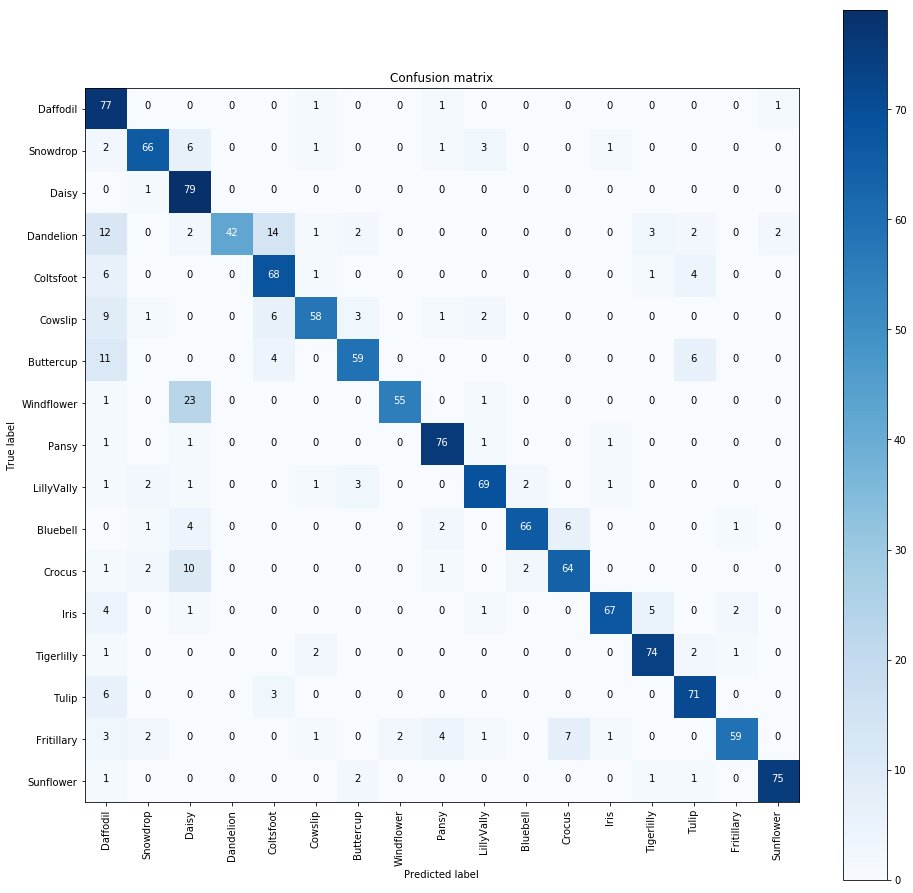

In [31]:
plt.figure(figsize=(16,16))
plot_confusion_matrix(confusion_mtx.astype('int'), classes = imgListNames) 

# Results Analysis
Find images the model labeled incorrectly.

In [136]:
def print_mislabeled_images(classes, test_set_x, test_set_y, Y_prediction_test,maxPrint=20,startIndex=0):
    a = Y_prediction_test.argmax(axis=1) - test_set_y.argmax(axis=1)
    mislabeled_indices = np.asarray(np.where(a != 0))
    num_images = len(mislabeled_indices[0])
    print("Showing from ",startIndex," to ",startIndex-1+np.min([num_images,maxPrint,num_images-startIndex+1]), " of total ",num_images, "mislabeled.") 
    num_images=np.min([num_images,maxPrint,num_images-startIndex+1]) 
    for i in range(num_images):
        index = mislabeled_indices[0][i+startIndex-1]
        plt.subplot( int(maxPrint/5)+1, 4, i + 1)
        plt.imshow(test_set_x[index,:,:,:],interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[(Y_prediction_test.argmax(axis=1)[index])]
                  + " \n Actual: " + classes[test_set_y.argmax(axis=1)[index]])
    plt.show()

In [137]:
startIndex=1
maxPrint=20

## Run Cell Again and Again to View All 

Showing from  1  to  20  of total  235 mislabeled.


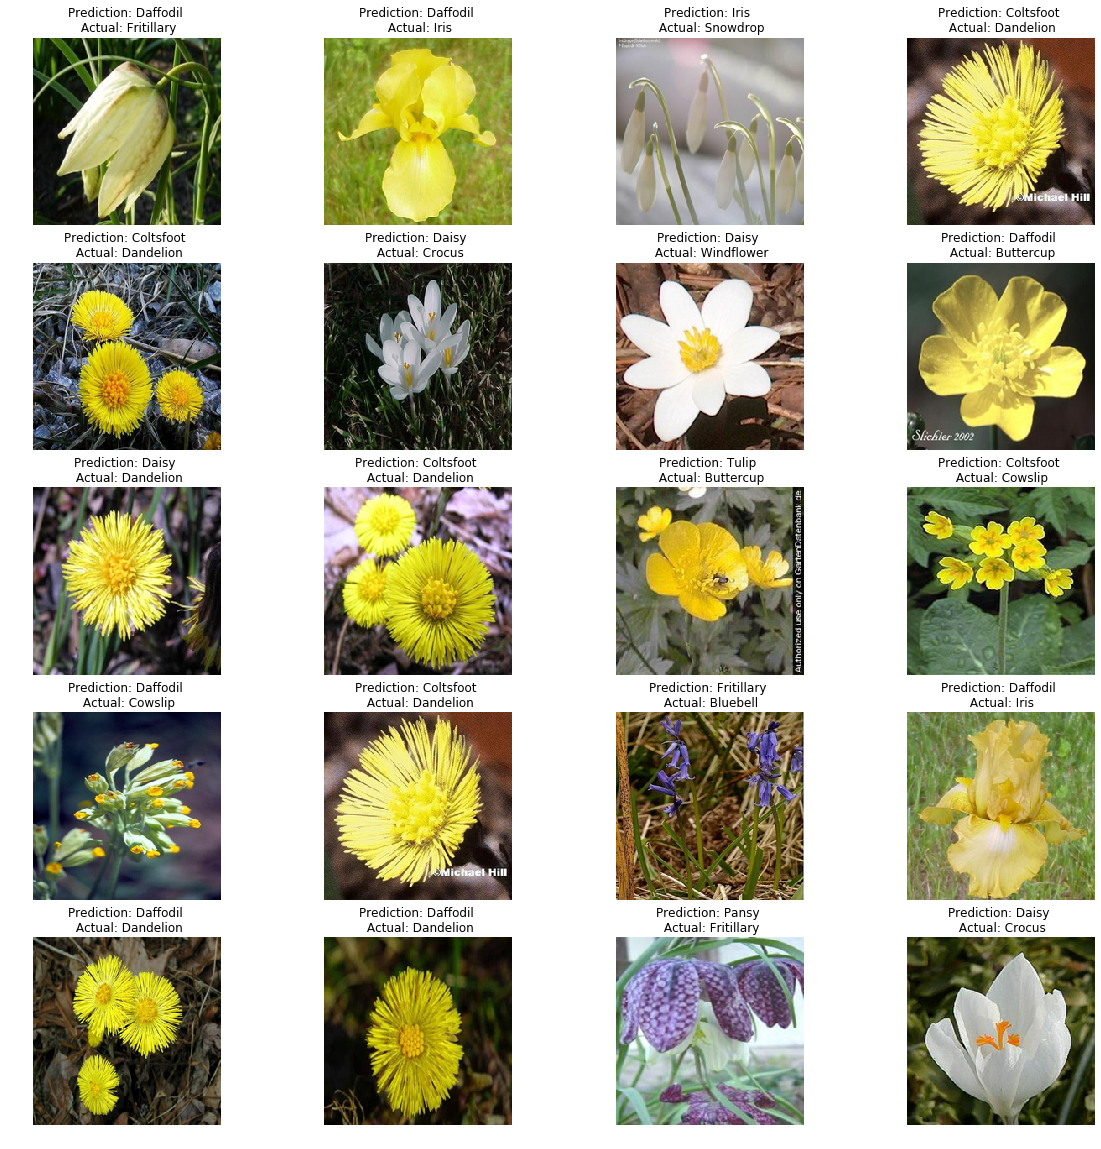

In [138]:
print_mislabeled_images(imgListNames, x_train, y_train, Y_pred,maxPrint=maxPrint,startIndex=startIndex)
startIndex=startIndex+maxPrint